## Modeling
- **Establish your baseline score.**
- Fit linear regression. Look at your coefficients. Are any of them wildly overblown?
    **For every 1 unit increase in $x_i$, we expect SalePrice to increase by $\beta_i$.**
- Fit lasso/ridge/elastic net with default parameters.
- Go back and remove features that might be causing issues in your models.
- Tune hyperparameters.
- **Identify a production model.** (This does not have to be your best performing Kaggle model, but rather the model that best answers your problem statement.)
- Refine and interpret your production model.

In [146]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
import statsmodels.api as sm

In [147]:
# Use IPython magic command %store to pass scaled & Test/Train-Split variables to Notebook: 03_Model_Benchmarks for model validation
# Got help from Stack Overflow on sharing variables between notebooks
#<https://stackoverflow.com/questions/31621414/share-data-between-ipython-notebooks>
# Access scaled & Test/Train-Split variables from Notebook: 02_Preprocessing_and_Feature_Engineering

# Model 1 Variables
%store -r Z_train
%store -r Z_test
%store -r y_train
%store -r y_test
%store -r features

# Model 2 Variables
%store -r Z_train2
%store -r Z_test2
%store -r y_train2
%store -r y_test2
%store -r features2
%store -r features2_dummified

# Model 3 Variables
%store -r Z_train3
%store -r Z_test3
%store -r y_train3
%store -r y_test3
%store -r features3
%store -r features3_dummified

# Model 4 Variables
%store -r Z_train4
%store -r Z_test4
%store -r y_train4
%store -r y_test4
%store -r features4
%store -r features4_dummified

### Model Preparation

##### Establish Baseline Score: Null Model

##### Instantiate the models

In [148]:
# Instantiate OLS regression
lm = LinearRegression()
lm2 = LinearRegression()
lm3 = LinearRegression()
lm4 = LinearRegression()

In [149]:
# Cross-Val Scores
lm_scores  = cross_val_score(lm,  Z_train,  y_train,  cv=5)
lm2_scores = cross_val_score(lm2, Z_train2, y_train2, cv=5)
lm3_scores = cross_val_score(lm3, Z_train3, y_train3, cv=5)
lm4_scores = cross_val_score(lm4, Z_train4, y_train4, cv=5)

In [150]:
print(lm_scores.mean(),lm2_scores.mean(), lm3_scores.mean(), lm4_scores.mean())

0.8255350620038329 0.844264294985785 0.868905621583161 0.8625798698924434


In [151]:
# Instantiate LassoCV, fit with default parameters
lasso  = LassoCV(n_alphas=200)
lasso2 = LassoCV(n_alphas=200)
lasso3 = LassoCV(n_alphas=200)
lasso4 = LassoCV(n_alphas=200)

In [152]:
# Use cross_val_score to evaluate LassoCV
lasso_scores  = cross_val_score(lasso,  Z_train,  y_train,  cv=5)
lasso2_scores = cross_val_score(lasso2, Z_train2, y_train2, cv=5)
lasso3_scores = cross_val_score(lasso3, Z_train3, y_train3, cv=5)
lasso4_scores = cross_val_score(lasso4, Z_train4, y_train4, cv=5)

In [153]:
print(lasso_scores.mean(),lasso2_scores.mean(),lasso3_scores.mean(),lasso4_scores.mean())

0.8255400995531034 0.8443413877421102 0.8686801446353531 0.8655335174522462


In [154]:
# Instantiate RidgeCV, fit with default parameters
ridge  = RidgeCV(alphas=np.linspace(.1, 10, 100))
ridge2 = RidgeCV(alphas=np.linspace(.1, 10, 100))
ridge3 = RidgeCV(alphas=np.linspace(.1, 10, 100))
ridge4 = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [155]:
# Use cross_val_score to evaluate RidgeCV
ridge_scores  = cross_val_score(ridge,  Z_train,  y_train,  cv=5)
ridge2_scores = cross_val_score(ridge2, Z_train2, y_train2, cv=5)
ridge3_scores = cross_val_score(ridge3, Z_train3, y_train3, cv=5)
ridge4_scores = cross_val_score(ridge4, Z_train4, y_train4, cv=5)

In [156]:
print(ridge_scores.mean(), ridge2_scores.mean(), ridge3_scores.mean(), ridge4_scores.mean())

0.8256013182256503 0.8442942827486402 0.8690152854776068 0.8680751657609687


##### Fit the best performing model

In [157]:
# Fit the linear regression to chosen scaled-features
lm.fit(Z_train, y_train)
lm2.fit(Z_train2, y_train2)
lm3.fit(Z_train3, y_train3)
lm4.fit(Z_train4, y_train4)

# 1. Train Score
lm_train_score = lm.score(Z_train,y_train)
lm2_train_score = lm2.score(Z_train2,y_train2)
lm3_train_score = lm3.score(Z_train3, y_train3)
lm4_train_score = lm4.score(Z_train4, y_train4)

# 2. Test Score
lm_test_score  = lm.score( Z_test,  y_test)
lm2_test_score = lm2.score(Z_test2, y_test2)
lm3_test_score = lm3.score(Z_test3, y_test3)
lm4_test_score = lm4.score(Z_test4, y_test4)

print(f'LinearReg 1:    Train={lm_train_score:.6f},\n\t\tTest= {lm_test_score:.6f}, \nCross-Val Score:Train={lm_scores.mean():.6f}\n')
print(f'LinearReg 2:    Train={lm2_train_score:.6f},\n\t\tTest= {lm2_test_score:.6f},\nCross-Val Score:Train={lm2_scores.mean():.6f}\n')
print(f'LinearReg 3:    Train={lm3_train_score:.6f},\n\t\tTest= {lm3_test_score:.6f}, \nCross-Val Score:Train={lm3_scores.mean():.6f}\n')
print(f'LinearReg 4:    Train={lm4_train_score:.6f},\n\t\tTest= {lm4_test_score:.6f}, \nCross-Val Score:Train={lm4_scores.mean():.6f}')

LinearReg 1:    Train=0.828701,
		Test= 0.829431, 
Cross-Val Score:Train=0.825535

LinearReg 2:    Train=0.848060,
		Test= 0.842411,
Cross-Val Score:Train=0.844264

LinearReg 3:    Train=0.874446,
		Test= 0.875300, 
Cross-Val Score:Train=0.868906

LinearReg 4:    Train=0.877838,
		Test= 0.876108, 
Cross-Val Score:Train=0.862580


In [158]:
##### Fit the lasso regression to chosen scaled-features
lasso.fit(Z_train, y_train)
lasso2.fit(Z_train2, y_train2)
lasso3.fit(Z_train3, y_train3)
lasso4.fit(Z_train4, y_train4)

# 1. Train Score
lasso_train_score  = lasso.score(Z_train,y_train)
lasso2_train_score = lasso2.score(Z_train2,y_train2)
lasso3_train_score = lasso3.score(Z_train3,y_train3)
lasso4_train_score = lasso4.score(Z_train4,y_train4)

# 2. Test Score
lasso_test_score  = lasso.score(Z_test, y_test)
lasso2_test_score = lasso2.score(Z_test2, y_test2)
lasso3_test_score = lasso3.score(Z_test3, y_test3)
lasso4_test_score = lasso4.score(Z_test4, y_test4)

print(f'LassoCV 1:   Train={lasso_train_score}, Test={lasso_test_score}, \nCross-Val Score: Train={lasso_scores.mean()}')
print(f'LassoCV 2:   Train={lasso2_train_score}, Test={lasso2_test_score}, \nCross-Val Score: Train={lasso2_scores.mean()}')
print(f'LassoCV 3:   Train={lasso3_train_score}, Test={lasso3_test_score}, \nCross-Val Score: Train={lasso3_scores.mean()}')
print(f'LassoCV 4:   Train={lasso4_train_score}, Test={lasso4_test_score}, \nCross-Val Score: Train={lasso4_scores.mean()}')

LassoCV 1:   Train=0.8286997327682366, Test=0.8293404037879297, 
Cross-Val Score: Train=0.8255400995531034
LassoCV 2:   Train=0.8480483894206118, Test=0.842524075994664, 
Cross-Val Score: Train=0.8443413877421102
LassoCV 3:   Train=0.8740250491341721, Test=0.8752848518532919, 
Cross-Val Score: Train=0.8686801446353531
LassoCV 4:   Train=0.8744696089816684, Test=0.8793848096202985, 
Cross-Val Score: Train=0.8655335174522462


In [159]:
# Fit the Ridge regression to chosen scaled-features
ridge.fit(Z_train, y_train)
ridge2.fit(Z_train2, y_train2)
ridge3.fit(Z_train3, y_train3)
ridge4.fit(Z_train4, y_train4)

# 1. Train Score
ridge_train_score = ridge.score(Z_train,y_train)
ridge2_train_score = ridge2.score(Z_train2,y_train2)
ridge3_train_score = ridge3.score(Z_train3,y_train3)
ridge4_train_score = ridge4.score(Z_train4,y_train4)

# 2. Test Score
ridge_test_score = ridge.score(Z_test, y_test)
ridge2_test_score = ridge2.score(Z_test2, y_test2)
ridge3_test_score = ridge3.score(Z_test3, y_test3)
ridge4_test_score = ridge4.score(Z_test4, y_test4)

print(f'RidgeCV r2 Score 1:   Train={ridge_train_score}, Test={ridge_test_score}, \nCross-Val Score: Train={ridge_scores.mean()}')
print(f'RidgeCV r2 Score 2:   Train={ridge2_train_score}, Test={ridge2_test_score}, \nCross-Val Score: Train={ridge2_scores.mean()}')
print(f'RidgeCV r2 Score 3:   Train={ridge3_train_score}, Test={ridge3_test_score}, \nCross-Val Score: Train={ridge3_scores.mean()}')
print(f'RidgeCV r2 Score 4:   Train={ridge4_train_score}, Test={ridge4_test_score}, \nCross-Val Score: Train={ridge4_scores.mean()}')

RidgeCV r2 Score 1:   Train=0.8286929472388197, Test=0.8292964728957292, 
Cross-Val Score: Train=0.8256013182256503
RidgeCV r2 Score 2:   Train=0.8480498693739363, Test=0.8424800270587778, 
Cross-Val Score: Train=0.8442942827486402
RidgeCV r2 Score 3:   Train=0.8743292367369074, Test=0.8750761138742769, 
Cross-Val Score: Train=0.8690152854776068
RidgeCV r2 Score 4:   Train=0.8759464594490652, Test=0.8805957841602731, 
Cross-Val Score: Train=0.8680751657609687


3. Cross-Val (the avg of five Test-scores) - This will serve as a baseline $R^2$ for the model

**Look at your coefficients.** Are any of them wildly overblown? 

For every 1 unit increase in  𝑥𝑖 , we expect SalePrice to increase by  𝛽𝑖 .

In [160]:
# The `lm` object contains our model's coefficients
coeff1 = pd.Series(lm.coef_,  index=features )[::-1]   # Model 1 Coefficients
coeff2 = pd.Series(lm2.coef_, index=features2_dummified)[::-1] # Model 2 Coefficients
coeff3 = pd.Series(lm3.coef_, index=features3_dummified)[::-1] # Model 3 Coefficients
coeff4 = pd.Series(lm4.coef_, index=features4_dummified)[::-1] # Model 4 Coefficients

for i in range(len(coeff4)):
    print(f'{coeff4[i]:,.2f}:\t{coeff4.index[i]}')

0.04:	NeighborhoodC_2
-0.03:	NeighborhoodC_1
-0.06:	Central AirC_1
0.03:	Heating QCC_2
-0.63:	Heating QCC_1
-0.05:	FoundationC_1
0.08:	Exter QualC_2
-0.17:	Exter QualC_1
-0.12:	Exterior 1stC_1
-0.07:	Bldg TypeC_1
0.05:	Condition 1C_2
-0.03:	Condition 1C_1
0.04:	Lot ConfigC_1
0.06:	Land ContourC_1
-0.08:	Lot ShapeC_1
-0.12:	Paved DriveC_1
0.11:	Overall Qual
0.13:	Gr Liv Area
0.03:	Garage Area
0.05:	Total Bsmt SF
0.02:	1st Flr SF
0.03:	Year Remod/Add
0.04:	Year Built/Remod


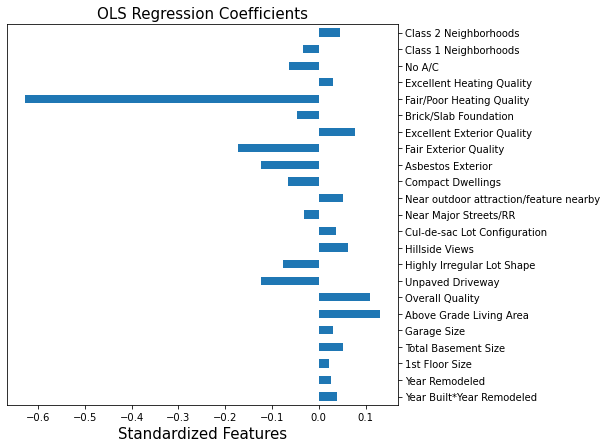

In [202]:
#pd.Series(lm.coef_, index=features).plot.barh(figsize=(7, 7));
#pd.Series(lm2.coef_, index=features2_dummified).plot.barh(figsize=(7, 7));
#pd.Series(lm3.coef_, index=features3_dummified).plot.barh(figsize=(7, 7));
ax = pd.Series(lm4.coef_, index=features4_dummified).plot.barh(figsize=(7, 7));

plt.xlabel('Standardized Features', fontsize=15);
plt.title(f'OLS Regression Coefficients', fontsize=15);
ax.yaxis.tick_right()
plt.yticks(list(range(23)), ['Year Built*Year Remodeled', 'Year Remodeled', '1st Floor Size','Total Basement Size','Garage Size','Above Grade Living Area', 'Overall Quality',
             'Unpaved Driveway', 'Highly Irregular Lot Shape', 'Hillside Views','Cul-de-sac Lot Configuration', 'Near Major Streets/RR', 'Near outdoor attraction/feature nearby','Compact Dwellings' ,
             'Asbestos Exterior','Fair Exterior Quality','Excellent Exterior Quality', 'Brick/Slab Foundation','Fair/Poor Heating Quality', 'Excellent Heating Quality', 'No A/C', 'Class 1 Neighborhoods', 'Class 2 Neighborhoods']);
plt.savefig( '../images/CoefficientsBarPlot.png');

In [162]:
# Investigate p-values
Z_train4 = sm.add_constant(Z_train4, prepend=True)
results = sm.OLS(y_train4, Z_train4).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     472.1
Date:                Fri, 09 Oct 2020   Prob (F-statistic):               0.00
Time:                        06:12:42   Log-Likelihood:                 815.67
No. Observations:                1535   AIC:                            -1583.
Df Residuals:                    1511   BIC:                            -1455.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               12.0424      0.007   1717.649      0.000      12.029      12.056
Year Built/Remod     0.0384      0.010      3.940      0.000       0.019       0.057
Year Remod/Add       0.0265      0.008      3.396      0.001       0.011       0.042
1st Flr SF           0.0224      0.007      3.408      0.001       0.010       0.035
Total Bsmt SF        0.0516      0.007      7.696      0.000       0.038       0.065
Garage Area          0.0298      0.005      6.034      0.000       0.020       0.040
Gr Liv Area          0.1308      0.005     25.495      0.000       0.121       0.141
Overall Qual         0.1099      0.006     17.088      0.000       0.097       0.123
Paved DriveC_1      -0.1227      0.015     -8.156      0.000      -0.152      -0.093
Lot ShapeC_1        -0.0755      0.051     -1.478      0.140      -0.176       0.025
Land ContourC_1      0.0626      0.019      3.298      0.001       0.025       0.100
Lot ConfigC_1        0.0366      0.015      2.388      0.017       0.007       0.067
Condition 1C_1      -0.0318      0.013     -2.381      0.017      -0.058      -0.006
Condition 1C_2       0.0526      0.046      1.138      0.255      -0.038       0.143
Bldg TypeC_1        -0.0666      0.014     -4.911      0.000      -0.093      -0.040
Exterior 1stC_1     -0.1233      0.029     -4.284      0.000      -0.180      -0.067
Exter QualC_1       -0.1724      0.034     -5.033      0.000      -0.240      -0.105
Exter QualC_2        0.0783      0.023      3.401      0.001       0.033       0.123
FoundationC_1       -0.0469      0.014     -3.328      0.001      -0.074      -0.019
Heating QCC_1       -0.6280      0.105     -6.006      0.000      -0.833      -0.423
Heating QCC_2        0.0301      0.009      3.316      0.001       0.012       0.048
Central AirC_1      -0.0639      0.017     -3.726      0.000      -0.098      -0.030
NeighborhoodC_1     -0.0343      0.011     -3.205      0.001      -0.055      -0.013
NeighborhoodC_2      0.0444      0.015      2.900      0.004       0.014       0.074
==============================================================================
Omnibus:                      672.492   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13744.349
Skew:                          -1.542   Prob(JB):                         0.00
Kurtosis:                      17.331   Cond. No.                         57.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [163]:
feature_dict = {}
for i in range(len(features)):
    feature_dict[features[i]] = lm.coef_[i]
feature_dict['intercept'] = lm.intercept_
print(feature_dict)
%store feature_dict

{'Year Remod/Add': 6620.134411628421, 'Year Built': 7501.748080552902, '1st Flr SF': 5836.855982582607, 'Total Bsmt SF': 13232.22128644088, 'Garage Area': 9703.314052728982, 'Gr Liv Area': 25308.68394047182, 'Overall Qual': 24491.524069321837, 'intercept': 181907.60679824272}
Stored 'feature_dict' (dict)


In [164]:
feature_df = pd.DataFrame(feature_dict.values(), feature_dict.keys())

In [165]:
# And the y-intercept.
print(f'Model 1 Intercept: {lm.intercept_:,.2f}')
print(f'Model 2 Intercept: {lm2.intercept_:,.2f}')
print(f'Model 3 Intercept: {lm3.intercept_:,.2f}')
print(f'Model 4 Intercept: {np.exp(lm4.intercept_):,.2f}')

Model 1 Intercept: 181,907.61
Model 2 Intercept: 178,022.25
Model 3 Intercept: 175,346.06
Model 4 Intercept: 169,796.27


## Modeling
- Go back and remove features that might be causing issues in your models.
- Tune hyperparameters.
- **Identify a production model.** (This is the model that best answers your problem statement.)
- Refine and interpret your production model.

In [166]:
# Create predictions using the `lm` object.
y_pred = lm.predict(Z_test)
y_pred2 = lm2.predict(Z_test2)
y_pred3 = lm3.predict(Z_test3)
y_pred4 = lm4.predict(Z_test4)

#Create a list of y_pred in X_test df b/c I want to use sns.regplot
Z_test['y_pred']  = y_pred
Z_test2['y_pred'] = y_pred2
Z_test3['y_pred'] = y_pred3
Z_test4['y_pred'] = y_pred4

In [167]:
y_score4 = np.exp(y_pred4)
%store y_score4

Stored 'y_score4' (ndarray)


In [168]:
# Check that all is copacetic
Z_test2.head(3)

,Year Remod/Add,Year Built,1st Flr SF,Total Bsmt SF,Garage Area,Gr Liv Area,Overall Qual,NeighborhoodC_1,NeighborhoodC_2,y_pred
1475,1.038166,1.137164,1.189491,1.309888,0.387148,0.239498,2.033620,0,1,309373.971206
692,-1.625734,-1.847503,-1.543422,-1.965095,-2.205421,-1.152405,-2.188308,1,0,28955.292110
100,0.943027,1.070838,1.907013,1.947994,0.918717,0.799554,2.033620,0,1,337331.409264


In [169]:
#%store X_test
%store Z_test
%store Z_test2
%store Z_test3
%store Z_test4

Stored 'Z_test' (DataFrame)
Stored 'Z_test2' (DataFrame)
Stored 'Z_test3' (DataFrame)
Stored 'Z_test4' (DataFrame)
